# Машинное обучение (семинары)

### Урок 4. Метод опорных векторов на практике

#### Домашние задание:

Выполните все пункты задания по ссылке (Скопировано в Task#1).

Краткое описание: в этом задании вам нужно будет обучить несколько моделей и сделать важные выводы. Более подробная информация — в блокноте.

Наборы данных: TestData.csv и TrainData.csv.


### 1. Загрузите тренировочные и тестовые датасеты

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, classification_report

# Загрузка данных из файла
df_Xtrain = pd.read_csv("TrainData.csv")
df_Xtest = pd.read_csv("TestData.csv")

In [3]:
df_Xtrain.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0


In [4]:
df_Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


Из общей информации df_Xtrain следует:

DataFrame содержит 7500 записей (от индекса 0 до 7499)

Всего 15 колонок

Нулевые значения отсуствуют

Пропущенные значения присуствуют в столбиках f2, f7, f11

In [23]:
duplicate_df_Xtrain = df_Xtrain[df_Xtrain.duplicated()]
print("number of duplicate rows: ", duplicate_df_Xtrain.shape)

number of duplicate rows:  (0, 15)


Дубликаты отсуствуют в DataFrame

In [26]:
# Проверка на NaN значения
df_Xtrain.isnull().any().any()

True

In [25]:
# Проверка на нулевые значения
df_Xtrain.isnull().sum()

f1           0
f2          75
f3           0
f4           0
f5           0
f6           0
f7        1875
f8           0
f9           0
f10          0
f11         10
f12          0
f13          0
f14          0
target       0
dtype: int64

В DataFrame присуствуют нулевые значения, для работы сним для начала их нужно обработать, поскольку DataFrame не несёт какой либо целевой информации предпологаю, что самум лучшим вариантом будет заполниить NaN средними значениями (медианами).

In [27]:
# создаём новый DataFrame который будет содержать заполнение медианами
median_df_Xtrain = pd.DataFrame(df_Xtrain)

# Заполнение NaN медианами соответствующих столбцов
fix_df_Xtrain = median_df_Xtrain.fillna(median_df_Xtrain.median())

print("Исходный DataFrame:")
print(median_df_Xtrain)
print("\nDataFrame после заполнения медианами:")
print(fix_df_Xtrain)

Исходный DataFrame:
      f1          f2      f3        f4  f5        f6        f7        f8  \
0     50  218.593930  273536  0.104575   4  0.445026  0.274531  0.444334   
1     32  276.771005  173314  0.224684  11  0.445026  0.439103  0.444334   
2     38  218.593930   28887  0.032491   7  0.445026  0.274531  0.444334   
3     19  218.593930  427862  0.179322  10  0.049127  0.044987  0.009499   
4     44  218.593930  109339  0.032491   7  0.098837  0.115721  0.066581   
...   ..         ...     ...       ...  ..       ...       ...       ...   
7495  48  218.593930  329778  0.171817   9  0.066372       NaN  0.066581   
7496  25  218.593930  104439  0.179322  10  0.049127  0.131370  0.103024   
7497  50  218.593930  162632  0.171817   9  0.445026  0.482222  0.444334   
7498  51  276.771005  174824  0.171817   9  0.049127  0.093897  0.103024   
7499  29  263.691684  180916  0.179322  10  0.066390  0.131370  0.066581   

             f9       f10     f11  f12  f13       f14  target  
0  

In [28]:
# Проверка на NaN значения
fix_df_Xtrain.isnull().any().any()

False

In [29]:
# Проверка на нулевые значения
fix_df_Xtrain.isnull().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
target    0
dtype: int64

In [33]:
fix_df_Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7500 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      7500 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7500 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


После проверки, видим, что все столбики заполнены.

In [5]:
# Статистический анализ числовых переменных Xtrain
df_Xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
f1,7500.0,38.579600,13.647719,17.000000,28.000000,37.000000,47.000000,9.000000e+01
f2,7425.0,238.905308,76.198282,64.259070,218.593930,218.593930,218.593930,5.753968e+02
f3,7500.0,190384.986800,105867.442524,19302.000000,118019.000000,179568.500000,239441.750000,1.226583e+06
f4,7500.0,0.238933,0.151738,0.000029,0.171817,0.179322,0.239316,7.293233e-01
f5,7500.0,10.083200,2.546071,1.000000,9.000000,10.000000,12.000000,1.600000e+01
f6,7500.0,0.238934,0.190283,0.049127,0.049127,0.098837,0.445026,4.450262e-01
f7,5625.0,0.240556,0.147371,0.000000,0.115721,0.241573,0.439103,4.822222e-01
f8,7500.0,0.238933,0.193365,0.009499,0.066581,0.103024,0.444334,4.843750e-01
f9,7500.0,23.893333,4.451530,5.970149,25.606721,25.606721,25.606721,2.560672e+01
f10,7500.0,0.238933,0.087708,0.113590,0.113590,0.300298,0.300298,3.002979e-01


In [6]:
df_Xtest.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,31,238.933333,47296,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,1740,20,0.238933,0
1,24,238.933333,33088,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
2,18,238.933333,283342,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
3,19,238.933333,393712,0.238933,9,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
4,28,238.933333,200515,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0


In [7]:
df_Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2500 non-null   int64  
 1   f2      2500 non-null   float64
 2   f3      2500 non-null   int64  
 3   f4      2500 non-null   float64
 4   f5      2500 non-null   int64  
 5   f6      2500 non-null   float64
 6   f7      2500 non-null   float64
 7   f8      2500 non-null   float64
 8   f9      2500 non-null   float64
 9   f10     2500 non-null   float64
 10  f11     2500 non-null   int64  
 11  f12     2500 non-null   int64  
 12  f13     2500 non-null   int64  
 13  f14     2500 non-null   float64
 14  target  2500 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 293.1 KB


Из общей информации df_Xtest следует:

DataFrame содержит 2500 записей (от индекса 0 до 2499)

Всего 15 колонок

Нулевые значения отсуствуют

Нет пропущеных записей в колонках

In [35]:
duplicate_df_Xtrain = df_Xtest[df_Xtest.duplicated()]
print("number of duplicate rows: ", duplicate_df_Xtrain.shape)

number of duplicate rows:  (0, 15)


Дубликаты отсуствуют в DataFrame

In [37]:
# Проверка на NaN значения
df_Xtest.isnull().any().any()

False

In [38]:
# Проверка на нулевые значения
df_Xtest.isnull().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
target    0
dtype: int64

Нулевые значения отсуствуют

In [8]:
# Статистический анализ числовых переменных Xtest
df_Xtest.describe().T

,count,mean,std,min,25%,50%,75%,max
f1,2500.0,38.069200,1.344217e+01,17.000000,27.000000,37.000000,47.000000,90.000000
f2,2500.0,238.933333,8.528219e-14,238.933333,238.933333,238.933333,238.933333,238.933333
f3,2500.0,191561.425200,1.075425e+05,19302.000000,119098.750000,177510.500000,238851.250000,910398.000000
f4,2500.0,0.238933,5.552226e-17,0.238933,0.238933,0.238933,0.238933,0.238933
f5,2500.0,10.056800,2.554875e+00,1.000000,9.000000,10.000000,12.000000,16.000000
f6,2500.0,0.238933,5.552226e-17,0.238933,0.238933,0.238933,0.238933,0.238933
f7,2500.0,0.238933,5.552226e-17,0.238933,0.238933,0.238933,0.238933,0.238933
f8,2500.0,0.238933,5.552226e-17,0.238933,0.238933,0.238933,0.238933,0.238933
f9,2500.0,23.893333,3.553424e-15,23.893333,23.893333,23.893333,23.893333,23.893333
f10,2500.0,0.238933,5.552226e-17,0.238933,0.238933,0.238933,0.238933,0.238933


### 2. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче?

In [39]:
# Подсчет экземпляров для целевой переменной df_Xtrain
print('df_Xtrain:')
class_counts_df_Xtrain = fix_df_Xtrain['target'].value_counts()
print(class_counts_df_Xtrain)

df_Xtrain:
target
0    5708
1    1792
Name: count, dtype: int64


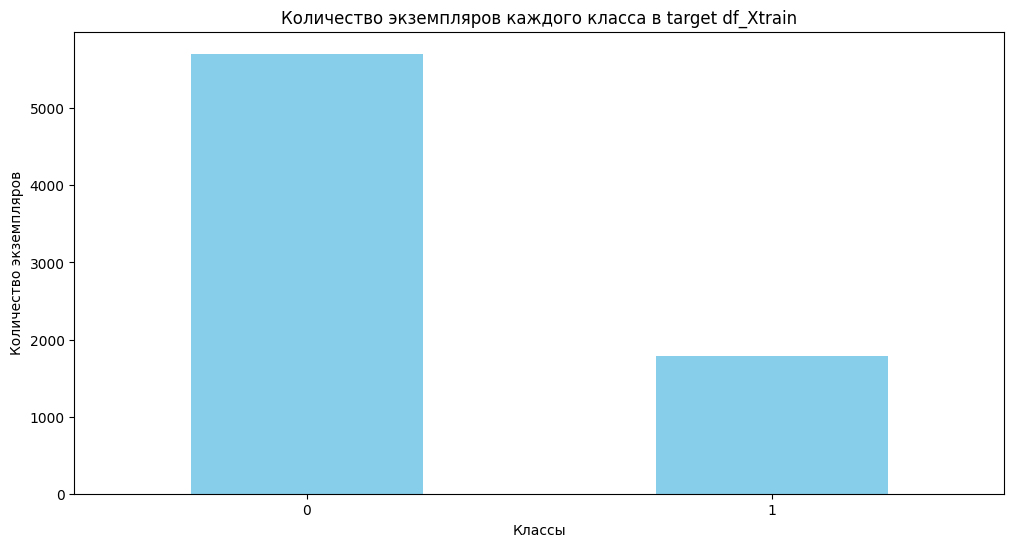

In [10]:
# Размер графика
plt.figure(figsize=(12, 6))

# Построение графика
class_counts_df_Xtrain.plot(kind='bar', color='skyblue')

plt.title('Количество экземпляров каждого класса в target df_Xtrain')
plt.ylabel('Количество экземпляров')
plt.xlabel('Классы')

# Повернуть метки оси x 
plt.xticks(rotation=0)

# Показать график
plt.show()

In [11]:
# Минимальное и максимальное количество экземпляров класса
min_class_count_df_Xtrain = class_counts_df_Xtrain.min()
max_class_count_df_Xtrain = class_counts_df_Xtrain.max()

# Рассчитайте коэффициент дисбаланса
imbalance_ratio_df_Xtrain = min_class_count_df_Xtrain / max_class_count_df_Xtrain

print(f'Минимальное количество экземпляров класса: {min_class_count_df_Xtrain}')
print(f'Максимальное количество экземпляров класса: {max_class_count_df_Xtrain}')
print(f'Коэффициент дисбаланса: {imbalance_ratio_df_Xtrain}')

Минимальное количество экземпляров класса: 1792
Максимальное количество экземпляров класса: 5708
Коэффициент дисбаланса: 0.31394533987386125


In [12]:
# Подсчет экземпляров для целевой переменной df_Xtest
print('df_Xtest:')
# Подсчет экземпляров для целевой переменной
class_counts_df_Xtest = df_Xtest['target'].value_counts()
print(class_counts_df_Xtest)

df_Xtest:
target
0    1913
1     587
Name: count, dtype: int64


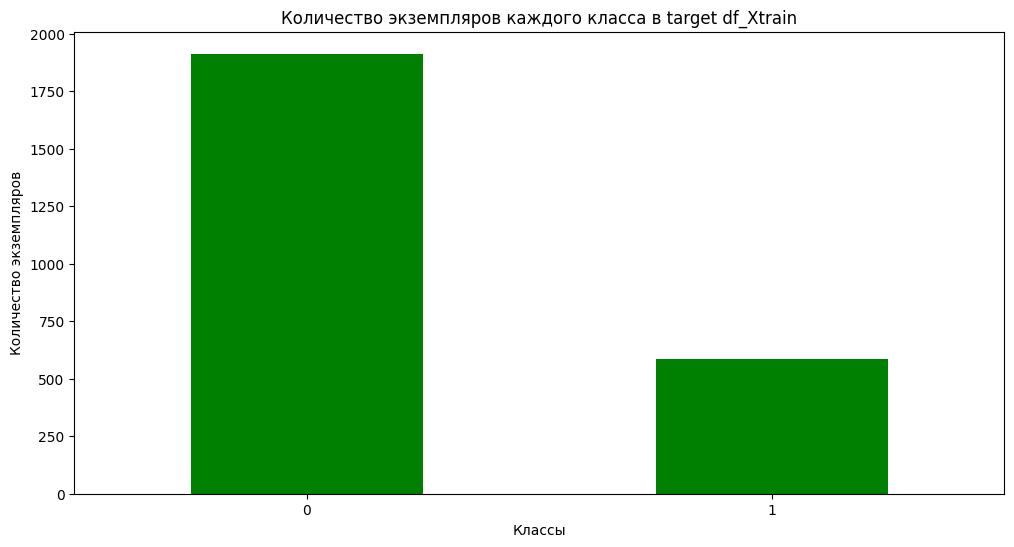

In [13]:
# Размер графика
plt.figure(figsize=(12, 6))

# Построение графика
class_counts_df_Xtest.plot(kind='bar', color='green')

plt.title('Количество экземпляров каждого класса в target df_Xtrain')
plt.ylabel('Количество экземпляров')
plt.xlabel('Классы')

# Повернуть метки оси x 
plt.xticks(rotation=0)

# Показать график
plt.show()

In [14]:
# Минимальное и максимальное количество экземпляров класса
min_class_count_df_Xtest = class_counts_df_Xtest.min()
max_class_count_df_Xtest = class_counts_df_Xtest.max()

# Рассчитайте коэффициент дисбаланса
imbalance_ratio_df_df_Xtest = min_class_count_df_Xtest / max_class_count_df_Xtest

print(f'Минимальное количество экземпляров класса: {min_class_count_df_Xtest}')
print(f'Максимальное количество экземпляров класса: {max_class_count_df_Xtest}')
print(f'Коэффициент дисбаланса: {imbalance_ratio_df_df_Xtest}')

Минимальное количество экземпляров класса: 587
Максимальное количество экземпляров класса: 1913
Коэффициент дисбаланса: 0.30684788290642967


В данных DataFrame обнаружен дисбаланс классов, в задаче с дисбалансом классов, использовать accuracy не самое лучшее решение. Accuracy рассчитывается как отношение количества правильно классифицированных примеров к общему количеству примеров. 

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test);
- обучите LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test).

In [41]:
# Определение независимых и зависимых переменных
X = fix_df_Xtrain.drop(["target"], axis=1) # Независимые переменные
y = fix_df_Xtrain['target']  # Зависимая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выводим размеры
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер обучающего набора: (6000, 14)
Размер тестового набора: (1500, 14)


In [56]:
# Обучение модели Logistic Regression
logistic_model = LogisticRegression()

# Обучение модели на обучающей выборке
logistic_model.fit(X_train, y_train)

# Обучение модели SVC
svc_model = SVC()

# Обучение модели на обучающей выборке
svc_model.fit(X_train, y_train)

# Применение модели на тестовых данных
y_pred_logistic = logistic_model.predict(X_test)

# Применение модели на тестовых данных
y_pred_svc = svc_model.predict(X_test)

# Оценка моделей
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
svc_accuracy = accuracy_score(y_test, y_pred_svc)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("SVC Accuracy:", svc_accuracy)

# Вывод отчетов о классификации
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("\nSVC Classification Report:\n", classification_report(y_test, y_pred_svc))

c:\Users\Esdesu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8046666666666666
SVC Accuracy: 0.782

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      1158
           1       0.71      0.25      0.36       342

    accuracy                           0.80      1500
   macro avg       0.76      0.61      0.62      1500
weighted avg       0.79      0.80      0.77      1500


SVC Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      1158
           1       0.94      0.05      0.09       342

    accuracy                           0.78      1500
   macro avg       0.86      0.52      0.48      1500
weighted avg       0.82      0.78      0.70      1500



Низкие показатели recall, f1 подтверждают сильный дисбаланс классов который был обнаружен выше, что свидетельсвует о том, что результаты accuracu_score не адекватные/не действительные.
Требуется явный баланс классов, для получения адекватных результатов.

### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете задавать class_weights;
- можете изменять параметры модели;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

##### Опыт 1

In [72]:
# Обучение модели Logistic Regression class_weight='balanced'
logistic_model_balanced = LogisticRegression(class_weight='balanced')

# Обучение модели на обучающей выборке
logistic_model_balanced.fit(X_train, y_train)

# Обучение модели SVC class_weight='balanced'
svc_model_balansed = SVC(class_weight='balanced')

# Обучение модели на обучающей выборке
svc_model_balansed.fit(X_train, y_train)

# Применение модели на тестовых данных
y_pred_logistic_balansed = logistic_model_balanced.predict(X_test)

# Применение модели на тестовых данных
y_pred_svc_balansed = svc_model_balansed.predict(X_test)

# Оценка моделей
logistic_accuracy_balansed = accuracy_score(y_test, y_pred_logistic_balansed)
svc_accuracy_balansed = accuracy_score(y_test, y_pred_svc_balansed)

print("Logistic Regression точность:", logistic_accuracy_balansed)
print("SVC точность:", svc_accuracy_balansed)

# Вывод отчетов о классификации
print("\nLogistic Regression:\n", classification_report(y_test, y_pred_logistic_balansed))
print("\nSVC:\n", classification_report(y_test, y_pred_svc_balansed))

c:\Users\Esdesu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression точность: 0.6566666666666666
SVC точность: 0.7926666666666666

Logistic Regression:
               precision    recall  f1-score   support

           0       0.85      0.68      0.75      1158
           1       0.35      0.59      0.44       342

    accuracy                           0.66      1500
   macro avg       0.60      0.63      0.60      1500
weighted avg       0.73      0.66      0.68      1500


SVC:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      1158
           1       0.94      0.10      0.18       342

    accuracy                           0.79      1500
   macro avg       0.87      0.55      0.53      1500
weighted avg       0.82      0.79      0.72      1500



Добавление class_weight='balanced' (автоматический рачёт веса) в SVC модель не дало никаких особо положительных результатов и попрежнемому данным данной модели нельзя доверять.
Logistic Regression наоборот получила неплохой буст в полноте но потеряла в точности, опять же не даёт сказать, что модель хорошо справляется с своей задачей.

##### Опыт 2

In [ ]:
# Обучение модели Logistic Regression class_weight='manual'
class_weights_log = {0: 1, 1: 3}
logistic_model_manual = LogisticRegression(class_weight=class_weights_log, solver='liblinear', C=1.0)

# Обучение модели на обучающей выборке
logistic_model_manual.fit(X_train, y_train)

# Обучение модели SVC class_weight='manual'
class_weights_svc = {0: 2, 1: 6}
svc_model_manual = SVC(class_weight=class_weights_svc, kernel='rbf', C=0.7)

# Обучение модели на обучающей выборке
svc_model_manual.fit(X_train, y_train)

# Применение модели на тестовых данных
y_pred_logistic_manual = logistic_model_manual.predict(X_test)

# Применение модели на тестовых данных
y_pred_svc_manual = svc_model_manual.predict(X_test)

# Оценка моделей
logistic_accuracy_manual = accuracy_score(y_test, y_pred_logistic_manual)
svc_accuracy_manual = accuracy_score(y_test, y_pred_svc_manual)

print("Logistic Regression точность:", logistic_accuracy_manual)
print("SVC точность:", svc_accuracy_manual)

# Вывод отчетов о классификации
print("\nLogistic Regression:\n", classification_report(y_test, y_pred_logistic_manual))
print("\nSVC:\n", classification_report(y_test, y_pred_svc_manual))

Logistic Regression точность: 0.77
SVC точность: 0.798

Logistic Regression:
               precision    recall  f1-score   support

           0       0.96      0.73      0.83      1158
           1       0.50      0.89      0.64       342

    accuracy                           0.77      1500
   macro avg       0.73      0.81      0.74      1500
weighted avg       0.85      0.77      0.79      1500


SVC:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      1158
           1       0.93      0.12      0.22       342

    accuracy                           0.80      1500
   macro avg       0.86      0.56      0.55      1500
weighted avg       0.83      0.80      0.73      1500



Поэксперементировав с ручными весами удалось поднять точность при Logistic Regression до 50% а при SVC до 93 однако если у Logistic Regression все хорошо с recall то при SVC этот парамерт всё ещё не велик и скорее всего модель даёт не правильные данные, несмотря на то, что она стала лучше по сравнению с автоматической балансировкой.

##### Опыт 3

In [143]:
# Создание новых признаков 
fix_df_Xtrain['f1_f2_interaction'] = fix_df_Xtrain['f1'] * fix_df_Xtrain['f2'] # Интеракция
fix_df_Xtrain['f3_log'] = np.log1p(fix_df_Xtrain['f3'])  # Логарифмирование
fix_df_Xtrain['f4_squared'] = fix_df_Xtrain['f4'] ** 2  # Квадрат

# Определение независимых и зависимых переменных
X = fix_df_Xtrain.drop(["target"], axis=1) # Независимые переменные
y = fix_df_Xtrain['target']  # Зависимая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выводим размеры
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер обучающего набора: (6000, 17)
Размер тестового набора: (1500, 17)


In [ ]:
# Обучение модели Logistic Regression с динамическими весами
class_weights_log_3 = {0: 1, 1: (len(y) / (2 * y.value_counts()[1]))}
logistic_model_3 = LogisticRegression(class_weight=class_weights_log_3, solver='liblinear', penalty='l1', C=0.1)

# Обучение модели на обучающей выборке
logistic_model_3.fit(X_train, y_train)

# Обучение модели SVC с динамическими весами
class_weights_svc_3 = {0: 1, 1: (len(y) / (2 * y.value_counts()[1]))}
# Создание и обучение модели SVC с масштабированием
svc_model_3 = SVC(class_weight=class_weights_svc_3, kernel='scale')


# Обучение модели на обучающей выборке
svc_model_3.fit(X_train, y_train)

# Применение модели на тестовых данных
y_pred_logistic_manual_3 = logistic_model_3.predict(X_test)

# Применение модели на тестовых данных
y_pred_svc_manual_3 = svc_model_3.predict(X_test)

# Оценка моделей
logistic_accuracy_manual_3 = accuracy_score(y_test, y_pred_logistic_manual_3)
svc_accuracy_manual_3 = accuracy_score(y_test, y_pred_svc_manual_3)

print("Logistic Regression точность:", logistic_accuracy_manual_3)
print("SVC точность:", svc_accuracy_manual_3)

# Вывод отчетов о классификации
print("\nLogistic Regression:\n", classification_report(y_test, y_pred_logistic_manual_3))
print("\nSVC:\n", classification_report(y_test, y_pred_svc_manual_3))

### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [ ]:
# Ваш код здесь

### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [ ]:
# Ваш код здесь

### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке?
- Ваша модель переобучилась, недообучилась или обучилась как надо?

In [ ]:
# Ваш текст здесь

Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.